In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
print ("Train data shape:", train.shape)

test = pd.read_csv('test.csv')
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


Ta thấy dữ liệu 2 tập gần như bằng nhau chỉ có số shape là khác, ta sẽ kiểm tra

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Kiểm tra tập test ta thấy thiếu cột kết kết quả so với train => đủ dữ liệu
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
import matplotlib.pyplot as plt
print("Biểu đồ histogram biểu hiện độ phân phối của dữ liệu qua độ nghiên")
print ("độ nghiên là:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='green')
plt.show()

Biểu đồ histogram biểu hiện độ phân phối của dữ liệu qua độ nghiên
độ nghiên là: 1.8828757597682129


<Figure size 640x480 with 1 Axes>

Sử dụng np.log() để phân phối lại độ nghiên đó
độ nghiên mới là: 0.12133506220520406


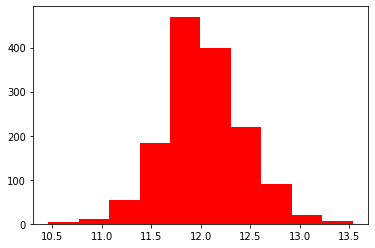

In [7]:
target = np.log(train.SalePrice)
print("Sử dụng np.log() để phân phối lại độ nghiên đó")
print ("độ nghiên mới là:", target.skew())
plt.hist(target, color='red')
plt.show()

# Xử lý dữ liệu số

In [8]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
corr = numeric_features.corr()

# Lọc các feature ảnh hưởng đến sale price
print ("Top 5 feature dạng số ảnh hưởng lớn đến sale price: ", corr['SalePrice'].sort_values(ascending=False)[:5], '\n')


Top 5 feature dạng số ảnh hưởng lớn đến sale price:  SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 



In [10]:
#Theo cột trên ta thấy Overall Qualily gần nhất với SalePrice  

In [11]:
train.OverallQual.unique()

quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

Tiếp theo khử nhiễu dữ liệu

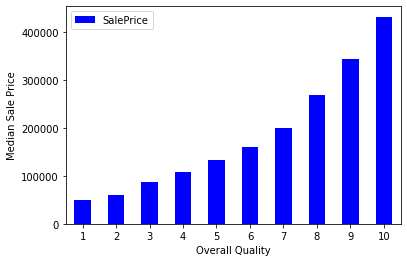

In [12]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

=>> Dữ liệu đã đều ta tiền hành kiểm tra 4 features còn lại

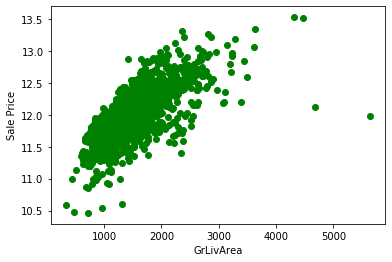

In [13]:
plt.scatter(x=train['GrLivArea'], y=target,color ="green")
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

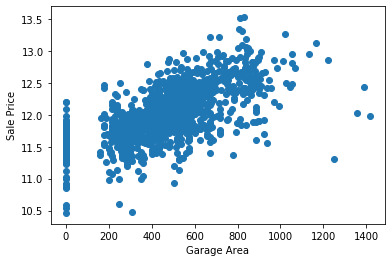

In [14]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

=>> Tại sơ đồ quan hệ giữa Garage Area và sale price, ta thấy điểm đi xuống của dữ liệu bắt đầu từ 1150, cho nên ta sẽ loại bỏ các outlier tại đây.


In [15]:
train = train[train['GarageArea'] < 1150]

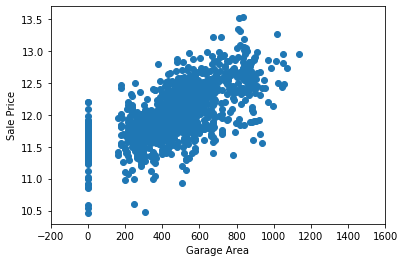

In [16]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [17]:
#Tìm và Khử null

In [18]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print("top10 các feature có null nhiều nhất: ")
nulls[0:10]

top10 các feature có null nhiều nhất: 


,Null Count
Feature,
PoolQC,1448
MiscFeature,1401
Alley,1363
Fence,1173
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


# Xử lý các dữ liệu ký tự

In [19]:
categoricals = train.select_dtypes(exclude=[np.number])

#In miêu tả dữ liệu cơ bản 
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1454,1454,91,1454,1454,1454,1454,1454,1454,1454,...,1373,1373,1373,1373,1454,6,281,53,1454,1454
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1146,1449,50,921,1308,1453,1048,1377,225,1256,...,866,605,1305,1320,1334,2,157,48,1266,1196


In [20]:
#Xử lý các cột có 2 thuộc tính và chuyển chúng về dạng binary
print ("Dữ liệu gốc cột street \n")
print (train.Street.value_counts(), "\n")

print ("Dữ liệu sau khi endcoding \n")
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
print (train.enc_street.value_counts())

Dữ liệu gốc cột street 

Pave    1449
Grvl       5
Name: Street, dtype: int64 

Dữ liệu sau khi endcoding 

1    1449
0       5
Name: enc_street, dtype: int64


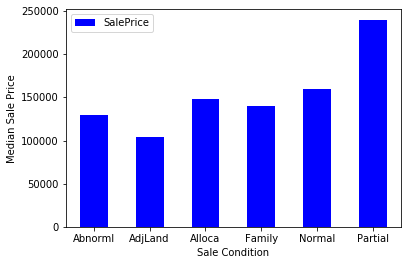

In [21]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Theo như hình thì cột partial cao nhất và cao hơn trung bình =>> Đưa cột Partial về 1 và các giá trị khác về 0

In [22]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

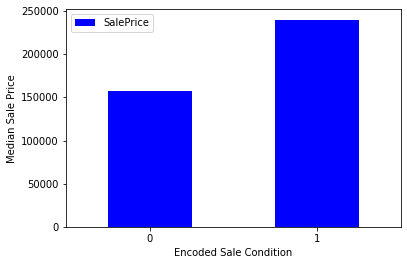

In [23]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [24]:
# Thêm giá thay thế vào vị trí null cảu các cột thuộc kiểu ký tự
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [25]:
#Kiểm tra null value của các cột
print("Tổng Số dữ liệu null: ",sum(data.isnull().sum() != 0))

Tổng Số dữ liệu null:  0


# Xây dựng model

In [26]:
# tập nhãn train
y = np.log(train.SalePrice)
#Tập X trừ nhãn và id
X = data.drop(['SalePrice', 'Id'], axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=32, test_size=.2)

In [28]:
from sklearn import linear_model
#Tạo model sử dung sklearn
liner = linear_model.LinearRegression()

#Fit dữ liệu vào model
model = liner.fit(X_train, y_train)

In [29]:
print ("R^2 : \n", model.score(X_test, y_test))

R^2 : 
 0.8865313714317127


In [30]:
predictions = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
print ('Bình phương sai số : \n', mean_squared_error(y_test, predictions))

Bình phương sai số : 
 0.01688153666140301


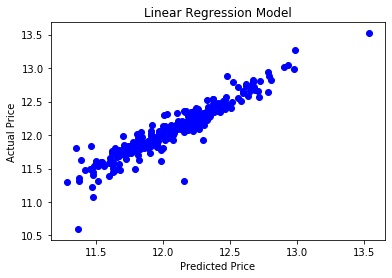

In [34]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=1,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()